In [11]:
import numpy as np
import matplotlib.pyplot as py
from scipy import stats

In [12]:
a = 0
b = np.pi
count = 10000
loc = 0
mu = 1

def func(x):
    return 1/(x**2 + (np.cos(x))**2)

def dist(x):
    return np.exp(-x)/(1 - np.exp(-np.pi))



func(0)/dist(0) - func(b)/dist(b)

-1.080150297527061

In [13]:
x_data = range(count)
mean_value = []
error_value = []
std = []

#w = 1/(1-np.exp(-np.pi))
np.random.seed(42)
x1 = np.random.uniform(a,b,count)
x = np.random.uniform(a,b,count)
yx = np.exp(-x)/(1 - np.exp(-np.pi))

y = func(yx)/(dist(yx))
#y1 = dist(yx)/q(yx)
mean_simple = []
error_simple = []
std_simple = []
z = func(x1)


for i in range(count):
        means = np.mean(y[:i+1])#(1 - np.exp(-np.pi))/np.pi#/np.mean(y1[:i+1])
        mean_value.append(means)
        value = np.std(y[:i+1])
        error = value/(i+1)**0.5
        error_value.append(error)
        std.append(value)

        means_simple = np.mean(z[:i+1])*(b-a)
        mean_simple.append(means_simple)
        values_simple = np.std(z[:i+1])
        errors_simple = values_simple/(i+1)**0.5
        error_simple.append(errors_simple)
        std_simple.append(values_simple)

print(f"Importance sampling value is: {mean_value[-1]} and simple sampling value is: {mean_simple[-1]}")
print(f"Importance sampling error value is: {error_value[-1]} and simple sampling error value is: {error_simple[-1]}")

Importance sampling value is: 1.309879360157812 and simple sampling value is: 1.6007981999127021
Importance sampling error value is: 0.003106809810328348 and simple sampling error value is: 0.0034554320058379495


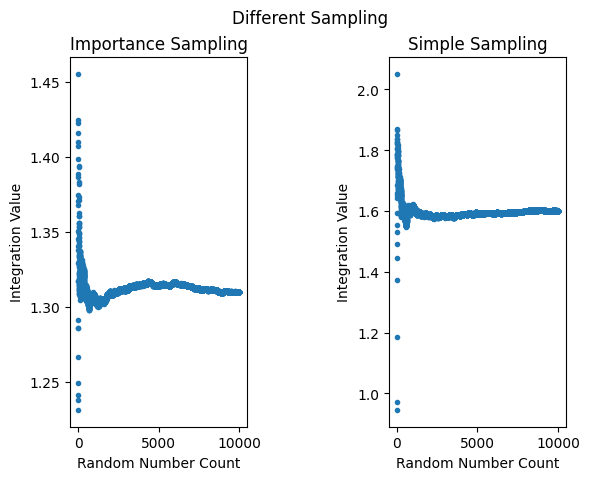

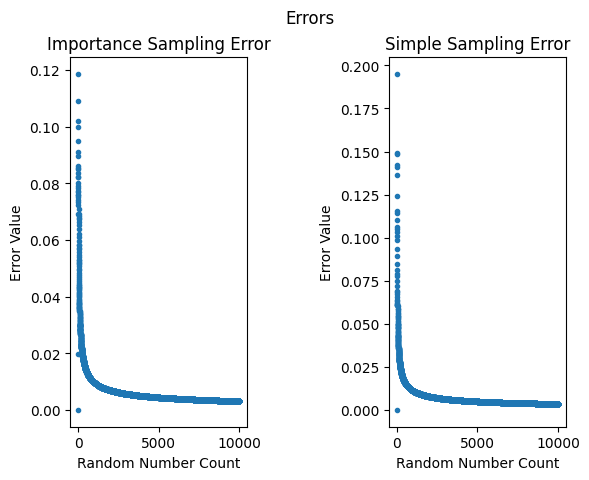

In [14]:
py.subplot(1,2,1)
py.xlabel("Random Number Count")
py.ylabel("Integration Value")
py.scatter(x_data,mean_value, marker= ".")
py.title("Importance Sampling")

py.subplot(1,2,2)
py.scatter(x_data,mean_simple, marker= ".")
py.xlabel("Random Number Count")
py.ylabel("Integration Value")
py.title("Simple Sampling")

py.suptitle("Different Sampling")
py.subplots_adjust(wspace=0.8)
py.show()
#################################################################3
py.subplot(1,2,1)
py.xlabel("Random Number Count")
py.ylabel("Error Value")
py.scatter(x_data,error_value, marker= ".")
py.title("Importance Sampling Error")

py.subplot(1,2,2)
py.scatter(x_data,error_simple, marker= ".")
py.xlabel("Random Number Count")
py.ylabel("Error Value")
py.title("Simple Sampling Error")

py.suptitle("Errors")
py.subplots_adjust(wspace=0.8)
py.show()
###############################################################


In [15]:
print(mean_value[-1], mean_simple[-1])
print(error_value[-1], error_simple[-1])

1.309879360157812 1.6007981999127021
0.003106809810328348 0.0034554320058379495


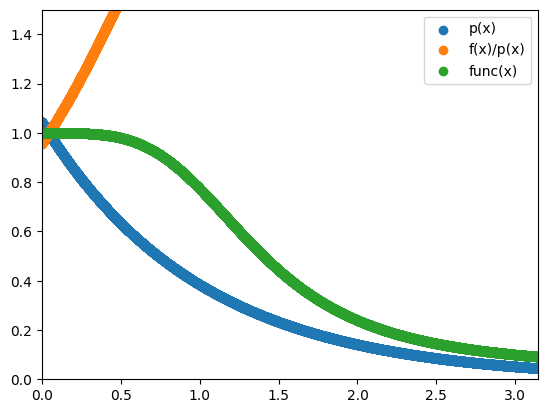

In [16]:
py.scatter(x1, dist(x1))
py.scatter(x1,func(x1)/dist(x1))
py.scatter(x1,func(x1))
py.ylim(0,1.5)
py.xlim(a,b)
py.legend(["p(x)","f(x)/p(x)","func(x)"])

In [17]:
i = 0.001
values = []
def demo_fun(a,b,x):
    return np.exp(-x*a)*a/b
while i<=1:
    coeff = -np.log(1-i)/np.pi
    fun_values = func(0)/demo_fun(coeff,i,0) - func(np.pi)/demo_fun(coeff,i,np.pi)
    values.append((coeff,i,fun_values))
    i += 0.001
    

In [18]:
errors = np.array([x[2] for x in values])

In [19]:
np.sort(errors[errors>=0])

array([4.30985863e-06, 1.29040525e-02, 2.56165218e-02, 3.81469736e-02,
       5.05004594e-02, 6.26818367e-02, 7.46957777e-02, 8.65467792e-02,
       9.82391699e-02, 1.09777119e-01, 1.21164645e-01, 1.32405617e-01,
       1.43503771e-01, 1.54462708e-01, 1.65285901e-01, 1.75976705e-01,
       1.86538358e-01, 1.96973990e-01, 2.07286622e-01, 2.17479176e-01,
       2.27554477e-01, 2.37515256e-01, 2.47364157e-01, 2.57103739e-01,
       2.66736476e-01, 2.76264766e-01, 2.85690933e-01, 2.95017226e-01,
       3.04245827e-01, 3.13378848e-01, 3.22418341e-01, 3.31366294e-01,
       3.40224636e-01, 3.48995238e-01, 3.57679919e-01, 3.66280442e-01,
       3.74798522e-01, 3.83235821e-01, 3.91593959e-01, 3.99874505e-01,
       4.08078989e-01, 4.16208896e-01, 4.24265670e-01, 4.32250716e-01,
       4.40165402e-01, 4.48011057e-01, 4.55788978e-01, 4.63500424e-01,
       4.71146624e-01, 4.78728772e-01, 4.86248033e-01, 4.93705543e-01,
       5.01102406e-01, 5.08439701e-01, 5.15718478e-01, 5.22939762e-01,
      

In [20]:
[(x[0],x[1]) for x in values if x[2]>= 1e-06]

[(0.00031846914730981944, 0.001),
 (0.0006372572422415928, 0.002),
 (0.0009563649242894594, 0.003),
 (0.00127579283487278, 0.004),
 (0.0015955416173438724, 0.005),
 (0.0019156119169957857, 0.006),
 (0.0022360043810701153, 0.007),
 (0.0025567196587648537, 0.008),
 (0.002877758401242285, 0.009000000000000001),
 (0.0031991212616369175, 0.010000000000000002),
 (0.0035208088950634555, 0.011000000000000003),
 (0.0038428219586248116, 0.012000000000000004),
 (0.004165161111420163, 0.013000000000000005),
 (0.004487827014553041, 0.014000000000000005),
 (0.004810820331139473, 0.015000000000000006),
 (0.005134141726316153, 0.016000000000000007),
 (0.005457791867248662, 0.017000000000000008),
 (0.0057817714231397305, 0.01800000000000001),
 (0.006106081065237538, 0.01900000000000001),
 (0.006430721466844056, 0.02000000000000001),
 (0.006755693303323442, 0.02100000000000001),
 (0.007080997252110461, 0.022000000000000013),
 (0.007406633992718963, 0.023000000000000013),
 (0.0077326042067504, 0.02400000